# Week2授業課題 富士下山 

## 【問題1】断面図の作成
前述の断面図をMatplotlibを使い作成してください。x=136の地点の赤い点や矢印も表示させてください。

これ以降の問題では下りる過程の可視化を行いますが、その際にはこの断面図を活用してください。

In [1]:
#import data set from CSV file
import numpy as np
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)

print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


In [2]:
import matplotlib.pyplot as plt


#タイトル、ラベル名をつける
plt.title("Mt.Fuji")
plt.xlabel("x")
plt.ylabel("evelation[m]" )


#断面図を作成する
plt.plot(fuji[:,0], fuji[:,3])

#x=136の地点を赤くする
plt.scatter(136, fuji[136,3], c='r');
plt.annotate('you', 
             xy=(136, fuji[136,3]),
             xytext=(136-50, fuji[136,3]),
            arrowprops=dict(arrowstyle='->')
            )


Text(86, 3434.59, 'you')

## 【問題2】勾配の計算の関数
授業前課題では各地点での勾配を最初に求めました。しかし、暗闇の富士山の比喩を考えると、知ることができるのはあなたがいる地点の勾配だけです。

ここでは「あなたが今いる地点x」と「その隣の地点x-1」の関係による勾配を求める関数を作成しましょう。この関数が返す値を「今いる地点の勾配」として次の問題で作成する関数内で使ってください。

勾配は授業前課題で行ったように、以下の計算で求まります。

Image from Gyazo

このデータでは「標高（elevation)」がyに相当します。xはそのまま「その地点の番号(x)」です。

In [3]:
#配列を入れて傾きを配列として
"""
input:
    xの配列
    yの配列
    
output:
    傾きの配列
"""

def slope(x, y):
    #xの変化量
    x_diff = np.diff(x, axis=0)
    #yの変化量
    y_diff = np.diff(y, axis=0)
    
    #slope計算
    s = y_diff/x_diff
    #slopeの１行目に0を挿入（インデックスをi-1 -> iにするため）
    s = np.insert(s, 0, 0)
    return s

s = slope(fuji[:, 0], fuji[:, 3])
s[0:10]

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  6.62,  0.59,  4.99,
       42.21])

In [4]:
#配列fujiに結合するためにReshape
s = s.reshape(s.size,1)
s[0:10]

array([[ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 6.62],
       [ 0.59],
       [ 4.99],
       [42.21]])

In [5]:
# fujiの６列目にslopeを代入
fuji = np.concatenate((fuji, s), axis=1)
fuji[0:10]

array([[   0.      ,   35.134141,  139.132082,    0.      ,    0.      ,
           0.      ],
       [   1.      ,   35.135826,  139.129202,    0.      ,  322.      ,
           0.      ],
       [   2.      ,   35.13751 ,  139.126322,    0.      ,  644.      ,
           0.      ],
       [   3.      ,   35.139194,  139.123441,    0.      ,  966.      ,
           0.      ],
       [   4.      ,   35.140878,  139.12056 ,    0.      , 1288.      ,
           0.      ],
       [   5.      ,   35.142562,  139.117679,    0.      , 1611.      ,
           0.      ],
       [   6.      ,   35.144246,  139.114799,    6.62    , 1933.      ,
           6.62    ],
       [   7.      ,   35.145929,  139.111917,    7.21    , 2255.      ,
           0.59    ],
       [   8.      ,   35.147613,  139.109036,   12.2     , 2577.      ,
           4.99    ],
       [   9.      ,   35.149297,  139.106155,   54.41    , 2899.      ,
          42.21    ]])

## 【問題3】勾配降下法の関数を作成
授業前課題では説明までとした勾配降下法ですが、これを行う関数を作成してください。

数式で表すと 「移動すべき地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。

この関数を使い、あなたが今いるxが136の地点（標高3434.59[m]）から、山を下っていきましょう。移動毎の標高はリストに記録し、その過程を可視化してください。断面図を目視したり、読み込んだ数値を確認して分かることと比べてどうなっているでしょうか。

実装上の注意

移動すべき地点は基本的には少数となりますが、勾配の情報は整数値の場所でしか得られません。そのため、四捨五入により整数値に変換する必要があります。

可視化のヒント

断面図の中に点を表示したり、繰り返し毎の標高や勾配を折れ線グラフで見てみることができます。

α の補足

α は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わりますから、関数の引数にしてください。複数試し、うまく下りられる α の値を見つけましょう。

初期値の補足

最初に居たx=136の地点のことを初期値と呼びます。この初期値によってどこに下っていくかが変わりますから、これも関数の引数にしてください。

In [6]:
'''
input
    今いる地点：x
    学習率：a
    
output
    移動すべき地点(x)
'''
alpha = 0.1
std_slope = 4

# 移動すべき地点の関数
def place_to_move(x=136, a = alpha):
    p = int(x - a * fuji[x, 5])

    return p

#今いる地点をリスト化
current_place = [136]
#counter
cnt = 0

#傾きが一定の基準値(std_slope)以下になるまで移動のループ処理を行う
while abs(fuji[current_place[cnt], 5]) > std_slope :
    print(current_place[-1])
    current_place.append(place_to_move(current_place[cnt]))
    cnt += 1


136
119
113
107
102
99
97
94
91
89
86
84
82


## 【問題4】初期値の変更
ここまでの問題では最初のxを136としましたが、xの初期値を変更すると結果が変化します。特にxを139より大きい値にすると、富士山の反対側の斜面を下りていくことになります。

そういった初期値を設定した上で、移動毎の標高はリストに記録し、その過程を可視化してください。

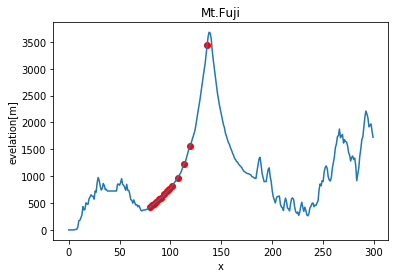

In [10]:
#タイトル、ラベル名をつける
plt.title("Mt.Fuji")
plt.xlabel("x")
plt.ylabel("evelation[m]" )

#断面図を作成する
plt.plot(fuji[:,0], fuji[:,3])

#移動していった地点を赤くする
plt.scatter(current_place, fuji[current_place,3], c='r');

## 【問題5】（アドバンス課題）並列計算
初期値によって結果が変化するわけですから、0から299まで全ての初期値の計算を行ってみるということを考えられます。

for文を使い繰り返すこともできますが、NumPyの配列を工夫して使うことで複数の計算を同時に行うことができます。ここまで作成した関数を複数の初期値が同時に計算できるように改良してください。

この改良は次のハイパーパラメータの検証にも応用することができます。

ヒント

NumPyは配列間で四則演算などの操作が可能です。以下のサンプルコードの3行目と4行目の挙動を参考にしてください。特に4行目の計算はブロードキャストと呼ばれるNumPy独特の機能であるため、各自でも調査してください。

1

2

3

4

array1 = np.ones(300)
array2 = np.arange(300)
array3 = array1*array2
array4 = array3 + 1 # ブロードキャスト

In [11]:
'''
input
    今いる地点：x
    学習率：a
    
output
    移動すべき地点(x)
'''
alpha = 0.1
MAX_OF_X = len(fuji) 
MIN_OF_X = 0

# 移動すべき地点の関数
def place_to_move(x, a = alpha):
    p = x - a * fuji[x, 5]
    #整数にする（配列のインデックスとしてFloat型は使えない）
    p = np.round(p).astype(np.int64)
    #配列の長さ以上の点には移動できないので、その様な移動をした場合は両端の点に収束させる
    #Fujiの場合 0 <= x < 300
    p = np.where(p >= MAX_OF_X, MAX_OF_X - 1, p)
    p = np.where(p < MIN_OF_X, 0, p)
    
    return p

def parallel_gradient_descent(x, a=alpha, rpt=10):
    x_array = x
    #ある座標に落とした時に落ち着く場所を1ループごとに記録
    for _ in range(rpt):
        x = place_to_move(x_array[:,-1].reshape(len(x), 1), a)
        x_array = np.concatenate((x_array, x), axis=1) 
    return x_array

#fujiのx座標の情報を取り出して(x.size, 1)に格納
place = fuji[:, 0].reshape(len(fuji[:, 0]), 1).astype(np.int64)


#　x座標の各点にボールを落とした時のボールの軌跡を(x.size, loop回数)に格納
x1 = parallel_gradient_descent(place, 0.1, 10 )
x1[135:145]

array([[135, 117, 110, 107, 103,  99,  98,  96,  93,  91,  90],
       [136, 119, 113, 108, 105, 102, 100,  98,  96,  93,  91],
       [137, 120, 116, 109, 106, 104, 101,  99,  98,  96,  93],
       [138, 130, 116, 109, 106, 104, 101,  99,  98,  96,  93],
       [139, 141, 163, 168, 170, 172, 175, 176, 176, 176, 176],
       [140, 150, 159, 166, 167, 171, 175, 176, 176, 176, 176],
       [141, 163, 168, 170, 172, 175, 176, 176, 176, 176, 176],
       [142, 160, 164, 167, 171, 175, 176, 176, 176, 176, 176],
       [143, 158, 161, 167, 171, 175, 176, 176, 176, 176, 176],
       [144, 160, 164, 167, 171, 175, 176, 176, 176, 176, 176]])

## 【問題6】（アドバンス課題）ハイパーパラメータの検証
勾配降下法の中で 
α
 はハイパーパラメータであり、前の問題でも複数試して良い結果が得られるものを探しました。これを発展させ、
α
 を一定間隔で変化させていき、それぞれの山の下り方の比較を行ってください。うまい下り方となる 
α
 を見つけるだけではなく、大きかったり小さかった時にどうなるのかを検証して説明してください。

ヒント

検証のための一例として、横軸を 
α
 、縦軸を一定回の繰り返し後のxや標高にした散布図を描いてみるという方法が考えられます。

In [12]:
"""
alphaを0 ~ 0.95まで振った際に点がどの様に動くか検証
"""
def check_behavior_by_changing_alpha(place, a = alpha, cnt = 10):
    # iの増分に応じてalphaをalpha*iに更新してgradient_descentを呼ぶ
    for i in range (20):
        x = parallel_gradient_descent(place, a*i, cnt)
        label = np.full((len(x),1), a*i)
        x = np.concatenate((x, label), axis = 1)
        if (i == 0):
            x_array = x
        else:
            x_array = np.concatenate((x_array, x), axis = 0)
    return x_array

#特徴の違う4点で挙動を確認
test_points = np.array([
    [134],#山頂の左側
    [140],#山頂の右側
    [210],#谷
    [7]#平地
])

x2 = check_behavior_by_changing_alpha(test_points,0.05)
x2[0:10]

array([[134.  , 134.  , 134.  , 134.  , 134.  , 134.  , 134.  , 134.  ,
        134.  , 134.  , 134.  ,   0.  ],
       [140.  , 140.  , 140.  , 140.  , 140.  , 140.  , 140.  , 140.  ,
        140.  , 140.  , 140.  ,   0.  ],
       [210.  , 210.  , 210.  , 210.  , 210.  , 210.  , 210.  , 210.  ,
        210.  , 210.  , 210.  ,   0.  ],
       [  7.  ,   7.  ,   7.  ,   7.  ,   7.  ,   7.  ,   7.  ,   7.  ,
          7.  ,   7.  ,   7.  ,   0.  ],
       [134.  , 128.  , 122.  , 119.  , 116.  , 113.  , 110.  , 109.  ,
        107.  , 105.  , 104.  ,   0.05],
       [140.  , 145.  , 153.  , 156.  , 159.  , 162.  , 164.  , 165.  ,
        167.  , 169.  , 170.  ,   0.05],
       [210.  , 211.  , 214.  , 217.  , 219.  , 214.  , 217.  , 219.  ,
        214.  , 217.  , 219.  ,   0.05],
       [  7.  ,   7.  ,   7.  ,   7.  ,   7.  ,   7.  ,   7.  ,   7.  ,
          7.  ,   7.  ,   7.  ,   0.05],
       [134.  , 122.  , 115.  , 110.  , 107.  , 103.  ,  99.  ,  98.  ,
         96.  ,  93.  , 

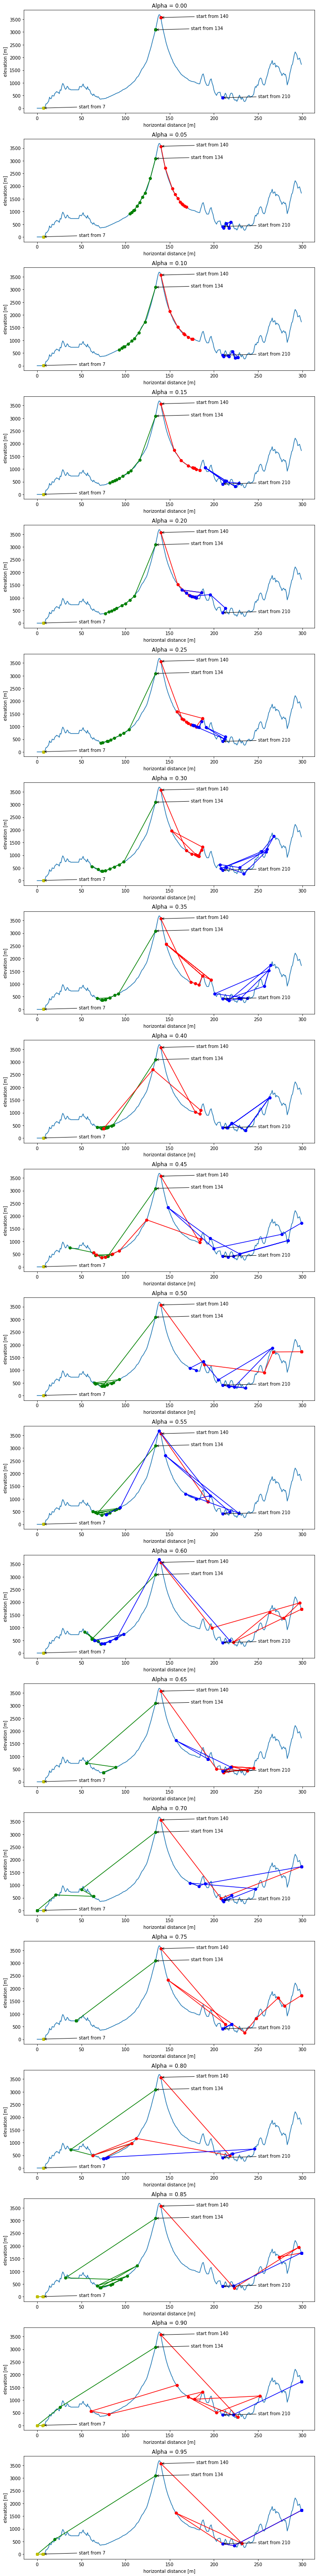

In [13]:
"""
グラフ化
"""
#alphaの組み合わせを重複を除いてリスト化
alp_set = np.unique(x2[:,-1])

#plotの集合axesを定義。まとまり全体はfigで参照できる
#10行１列でaxeを配置したfig
fig, axes = plt.subplots(len(alp_set), 1, figsize=(10,80))

for i in range(len(alp_set)):
    axe = axes[i]
    axe.plot(fuji[:,0], fuji[:,3])
    #タイトル、ラベル名をつける
    axe.set_title('Alpha = %.2f' % alp_set[i])
    axe.set_xlabel('horizontal distance [m]')
    axe.set_ylabel('elevation [m]')

    for idx in range(len(test_points)):
        #開始地点ｘ={134, 140, 206, 7}に対応したデータのみを取り出す
        data = x2[x2[:, 0] == test_points[idx]]
        
        #[-1]にはalphaの値が入っているので[-2]までのデータをプロット。
        axe.plot(data[i,:-2], fuji[data[i, :-2].astype(np.int64),3], marker='o',c='grby'[idx]);
        #開始地点に説明をつける
        axe.annotate(
            s = ('start from %d' % test_points[idx]) ,
            xy =(data[i,0], fuji[data[i,0].astype(np.int64), 3]),
            xytext=(data[i,0]+40, fuji[data[i,0].astype(np.int64), 3]),
            arrowprops = dict(arrowstyle='->')
        )
        """
        #各ステップに番号を振る
        row, col = data[:, :-2].shape
        for stp in range(col):
            axe.annotate(
                s=('%d' % stp),
                xy = (data[i, stp], fuji[data[i,stp].astype(np.int64), 3]),
                xytext=(data[i, stp]-10, fuji[data[i, stp].astype(np.int64), 3]),
                color='grby'[idx]
            )
        """
#各グラフの表示の被りをなくす
fig.tight_layout()

In [14]:
"""
alphaを１からLoop毎に小さくしていった際にどの様に動くか検証
"""
import math

def place_to_move_with_decreasing_alpha(x, a, lp):
    #loop回数lpごとにアルファを小さくしていく
    #p = x - (a/lp) * fuji[x, 5]
    p = x - (a/lp) * fuji[x, 5]
    #整数にする（配列のインデックスとしてFloat型は使えない）
    p = np.round(p).astype(np.int64)
    #配列の長さ以上の点には移動できないので、その様な移動をした場合は両端の点に収束させる
    #Fujiの場合 0 <= x < 300
    p = np.where(p >= MAX_OF_X, MAX_OF_X - 1, p)
    p = np.where(p < MIN_OF_X, 0, p)
    
    return p

def parallel_gradient_descent_with_decreasing_alpha(x, a=alpha, rpt=10):
    x_array = x
    #ある座標に落とした時に落ち着く場所を1ループごとに記録
    for i in range(rpt):
        x = place_to_move_with_decreasing_alpha(x_array[:,-1].reshape(len(x), 1), a, (i+1))
        x_array = np.concatenate((x_array, x), axis=1) 
    return x_array

#fujiのx座標の情報を取り出して(x.size, 1)に格納
place = fuji[:, 0].reshape(len(fuji[:, 0]), 1).astype(np.int64)
x4 = parallel_gradient_descent_with_decreasing_alpha(test_points, 1, 100 )
print(x4)

[[134  14   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [140 237 183 186 159 172 177 178 179 180 183 184 184 184 184 184 184 184
  184 184 184 184 184 184 184 184 184 184 184 184 184 184 184 184 184 184
  184 184 184 184 184 184 184 184 184 184 184 184 184 184 184 184 184 184
  184 184 184 184 184 184 184 184 184 184 184 184 184 184 184 184 184 184
  184 184 184 184 184 184 184 184 184 184 184 184 184 184 184 184 184 184
  184 184 184 184 184 184 184 184 184 184 184]
 [210 224 237 201 228 206 206 206 206 206 206 206 206 206 206 206 206 206
  206 206 206 206 206 206 206 206 206 206 206 206 206 206 206 206 206 206
  206 206 206 206 

In [15]:
def plot_trajectory(x):
    #タイトル、ラベル名をつける
    plt.title("Mt.Fuji")
    plt.xlabel("x")
    plt.ylabel("evelation[m]" )

    #断面図を作成する
    plt.plot(fuji[:,0], fuji[:,3])
    #移動していった地点を塗る
    for idx in range(x.shape[0]):
        plt.plot(x[idx,:], fuji[x[idx, :].astype(np.int64), 3], marker='o',c='grby'[idx])
        plt.annotate(
            s = ('start %d' % test_points[idx]) ,
            xy =(x[idx,0], fuji[x[idx, 0].astype(np.int64), 3]),
            xytext=(x[idx, 0]+20, fuji[x[idx, 0].astype(np.int64), 3]),
            arrowprops = dict(arrowstyle='->'),
            color = 'grby'[idx]
        )
        plt.annotate(
            s = ('end') ,
            xy =(x[idx,-1], fuji[x[idx, -1].astype(np.int64), 3]),
            xytext=(x[idx, -1]+20, fuji[x[idx, -1].astype(np.int64), 3]),
            arrowprops = dict(arrowstyle='->'),
            color = 'grby'[idx]
        )

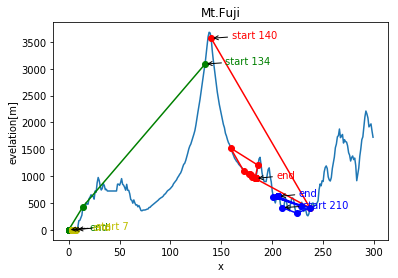

In [16]:
plot_trajectory(x4)

### 結果、考察
Alphaの値が小さすぎると点の動きが鈍く、谷に収束するまでにステップ数を要する。一方、大きいと一度に動く距離が大きくなり収束が早くなるが、大きすぎると収束できずに振動する。勾配降下のループを回すごとに1/(i+1)をかけてalphaがだんだん小さな値になるようにプログラムを組むと発散せずに谷っぽいところに収束するようにはなったが、谷にハマった後に抜け出すには心許ない

## 【問題7】（アドバンス課題）局所最適解
山を下りることで最終的には海（標高が0）に向かいたいですが、勾配降下法は「局所的最適解」となる地点にしか到達しない可能性があります。局所的最適解とはどういったもので、それへの対策はどういったことができるかを調査して説明してください。
言葉だけではなく、作成した関数も活用できると良いでしょう。

[[-0.3         0.16635     0.02083333]
 [-1.9        -1.34298333 -0.0965    ]
 [ 2.3        -5.57098333 -0.1525    ]]


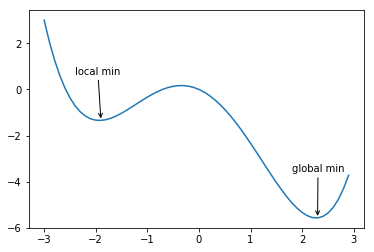

In [17]:
x = np.arange(-3, 3, 0.1)
x = x.reshape(x.size, 1)

y = (1/6)*x**4 + (-3/2)*x**2 + (-1)*x 
s = slope(x, y)
s = s.reshape(s.size, 1)
#x, y, slopeの順に格納
ary = np.concatenate((x, y), axis=1)
ary = np.concatenate((ary, s), axis=1)

#傾きがゼロに近い順にインデックス取得
slp_ascd = np.argsort(abs(ary[:, 2]))

#傾きがゼロに近い順にaryを並び替え
ary_ascd_slp = ary[slp_ascd]
print(ary_ascd_slp[1:4,:])

plt.plot(x, y);


plt.annotate(
    s='local min',
    xy=(ary_ascd_slp[2,0], ary_ascd_slp[2,1]),
    xytext =(ary_ascd_slp[2,0]-0.5, ary_ascd_slp[2,1]+2),
    arrowprops = dict(arrowstyle='->')
);
plt.annotate(
    s='global min',
    xy=(ary_ascd_slp[3,0], ary_ascd_slp[3,1]),
    xytext =(ary_ascd_slp[3,0]-0.5, ary_ascd_slp[3,1]+2),
    arrowprops = dict(arrowstyle='->')
);

## 考察
局所最適解は関数の極小値を意味する。複数の極小値の中の一つが最小値となる。ある一つの極小値をとる谷の中に点が捕捉されることで降下が収束し、他の極小値の中にある全体最適解にたどり着けない可能性がある。
全体最適解にたどり着くための策の１つとして確率的勾配降下法がある。ループごとに使う傾きをシャッフルして降下していくことで局所解に止まる可能性を低くする。実際、谷に捕らわれそうになっても、ランダムな傾きに基づいてジャンプするためか、抜け出すことはできそうだが、局所最適解にすら到達しない場合もある。

In [18]:
def parallel_stochastic_gradient_descent(x, a=alpha):
    #インデックスを0-299で生成
    indices = np.arange(len(fuji)) 
    #ある座標に落とした時に落ち着く場所を1ループごとに記録
    x_array = x
    #ループ数を規定
    lp = 0 
    while (True):
        lp += 1
        #インデックスを一様乱数でシャッフル
        np.random.shuffle(indices)
        x_bfr = x_array[:,-1].reshape(len(x), 1)
        #シャッフルしたインデックスを用いて傾きをシャッフルし、移動点を計算.
        #alphaはループごとにloop数の逆数をかけて小さくしていく
        x_aft = x_bfr - (a/lp) * fuji[indices[0:len(x)], 5].reshape(len(x), 1)
        
        #完全にランダム項を半分、現在地点に基づく項を半分ずつ入れた、バージョン
        #x_aft = x_bfr - (a/lp) * fuji[indices[0:len(x)], 5].reshape(len(x), 1) - (a/lp) * fuji[x_bfr[:,0], 5].reshape(len(x), 1)

        #配列の長さ以上の点には移動できないので、その様な移動をした場合は両端の点に収束させる
        #Fujiの場合 0 <= x < 300
        x_aft = np.where(x_aft >= MAX_OF_X, MAX_OF_X - 1, x_aft)
        x_aft = np.where(x_aft < MIN_OF_X, 0, x_aft)
        x_aft = np.round(x_aft).astype(np.int64)
        x_array = np.concatenate((x_array, x_aft), axis=1)
        
        #全ての点の差分が1以下になった時stop
        if (all([x < 1 for x in np.abs(x_aft - x_bfr)])):
            break
        #整数にする（配列のインデックスとしてFloat型は使えないので。）
    x_array = np.round(x_array).astype(np.int64)
    return x_array


#　x座標の各点にボールを落とした時のボールの軌跡を(x.size, loop回数)に格納
x5 = parallel_stochastic_gradient_descent(test_points, 1)

In [19]:
print(x5)

[[134  93  24  70  68  31  34  16   9   0  17  15   1   0   0   0   0   0
    4   0   0   0   0   0   0   0   2   5   1   3   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   3   2
    5   5   4   3   4   4   2   2   2   5   5   5]
 [140 205 191 183 192 171 186 178 168 174 168 170 165 166 166 174 166 165
  168 170 165 165 168 167 172 171 167 165 164 160 161 161 161 160 160 160
  159 155 149 152 149 149 146 146 145 141 141 142 138 137 135 136 134 133
  133 135 134 134 134 135 135 135 133 135 133 133]
 [210   0   0  24  18   0   4   3   4   4   1   0   0   0   0   0   0   3
    8   7  11  10   5   5   5   5   7   8   7   7   3   0   1   5   9  12
    9  10   7   7   8   4   5   1   0   0   0   0   0   3   4   4   4   4
    7   7   7   7   6   7   7   7   7   7   7   7]
 [  7   0   0   3   0   0   0   0   0   0   0   0   0   0   8   4   1   1
    0   1   1   0   0   7  16  13  13  14  11  12  13  13  12  10  10   8
    6   5   4   3   2   3   7   8

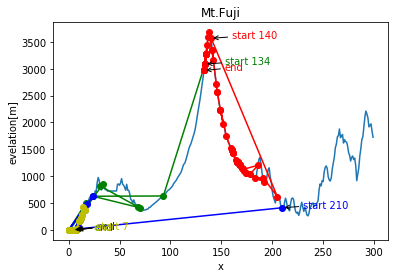

In [20]:
plot_trajectory(x5)